The first step should be importing the needed packages and defining the function f(x) and our initial parameters 

In [62]:
%pip install pandas
%pip install scipy
%pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [63]:
import numpy as np
import pandas as pd
from numpy import random
import scipy
import matplotlib

def func(inp):
    return 0.5*np.exp(-np.abs(inp))


    


In [64]:
def metropolis_hasting(x_0, N=10000, s=5):
    x_values = [x_0]
    for i in range(1,N):
        xi_minus1 = x_values[-1]
        x_star = random.normal(scale=s, loc=xi_minus1)
        r = func(x_star)/func(xi_minus1)
        u = random.uniform(0,1)

        if u < r:
            x_values.append(x_star)
        else:
            x_values.append(xi_minus1)
        
    return x_values            

         

In [65]:
x_values = metropolis_hasting(x_0=0)   
x_values[1:10]

[0,
 0,
 -3.5560785015149743,
 -1.684604835983766,
 -1.684604835983766,
 -1.684604835983766,
 3.2583816967380805,
 3.45742698143143,
 3.45742698143143]

Now for the second part, we introduce chains.

In [66]:
def mean(N=10000):
    return 1/N*sum(x_values)

print("mean:", mean())

def variance(N= 10000):
    mu = mean()  
    squared_diff = [(x - mu) ** 2 for x in x_values]  # Squared differences
    return 1/N*sum(squared_diff)

print("Variance:", variance())

mean: -0.002254929364263703
Variance: 2.06767497902032


In [67]:
def multi_metropolis_hasting(J, x_0=0, N=2000, s=0.001):
    multi = []
    for i in range(J):
        chain_result = metropolis_hasting(x_0 + i, N, s)
        multi.append(chain_result)
    return multi

chains = multi_metropolis_hasting(J=4)

for i in range(1,4):
    print(chains[i][1:10])


[0.9984051028629021, 0.9985418197266905, 0.9988089202642185, 0.997800897458837, 0.9974221776610152, 0.9968773862072972, 0.9962967139959553, 0.9963158604039443, 0.9976708137888309]
[2.0013188069378045, 2.002456497976107, 2.0031152866066697, 2.002596430486286, 2.0034654004989494, 2.0032424031834735, 2.0030697898934027, 2.0018241706740207, 2.0020454520432347]
[2.999464396218919, 3.0001356140715565, 2.9990755293016766, 2.99927333904871, 2.9990566295633823, 2.9992059360576313, 3.0004524090018934, 2.9995484351498605, 3.0002848399207473]


In [68]:
def overall_mean(J,chains, N=2000):
    means = []
    for i in range(J):
        individual_mean = 1/N*sum(chains[i])
        means.append(individual_mean)
        print(f"mean {i+1}: {individual_mean}")
    print(f"total mean: {sum(means)/J}\n")

overall_mean(J=4, chains=chains, N=2000)


def between_variance(J, chains, N=2000):
    variances = []
    for i in range(J):
        chain_mean = 1 / N * sum(chains[i])  
        squared_diff = [(x - chain_mean) ** 2 for x in chains[i]]  
        chain_variance = sum(squared_diff) / N  
        variances.append(chain_variance)
        print(f"Variance {i+1}: {chain_variance}")
    
    total_variance = sum(variances) / J
    print(f"Overall variance: {total_variance}")
    return total_variance


between_variance(J=4, chains=chains, N=2000)
btw_var = between_variance(J=4, chains=chains, N=2000) 

def overall_variance(J, chains, N=2000):
    variances = []
    for i in range(J):
        varst = np.var(chains)
    return varst    

print(overall_variance(J=4, chains=chains, N=2000))

ovr_var = overall_variance(J=4, chains=chains, N=2000)


mean 1: -0.006942370189102348
mean 2: 0.9343745034003201
mean 3: 2.032375938653071
mean 4: 3.021054555575997
total mean: 1.4952156568600714

Variance 1: 0.000284745556948022
Variance 2: 0.001380799486364439
Variance 3: 0.00014583092586865036
Variance 4: 0.00032209073624451753
Overall variance: 0.0005333666763564073
Variance 1: 0.000284745556948022
Variance 2: 0.001380799486364439
Variance 3: 0.00014583092586865036
Variance 4: 0.00032209073624451753
Overall variance: 0.0005333666763564073
1.2974701293795796


In [69]:
R_hat = np.sqrt((ovr_var+btw_var)/ovr_var)

R_hat

np.float64(1.0002055199041495)

Variance 1: 0.0001135712073069014
Variance 2: 0.00025778801985643226
Variance 3: 0.0016008310900703538
Variance 4: 0.00042258638597399904
Overall variance: 0.0005986941758019216
Variance 1: 0.0003754552042000692
Variance 2: 0.0007349458865403432
Variance 3: 0.000521809830532457
Variance 4: 0.0009985235263049383
Overall variance: 0.0006576836118944519
Variance 1: 0.00444136536682986
Variance 2: 0.003645000684368926
Variance 3: 0.0024518515863670366
Variance 4: 0.007960923983494683
Overall variance: 0.004624785405265126
Variance 1: 0.012984293162903535
Variance 2: 0.008578182165068915
Variance 3: 0.011280025877391374
Variance 4: 0.005929186600100407
Overall variance: 0.009692921951366057
Variance 1: 0.0075520266876914
Variance 2: 0.015065574200950125
Variance 3: 0.0024273742945963646
Variance 4: 0.012255260412727108
Overall variance: 0.00932505889899125
Variance 1: 0.01101423266823703
Variance 2: 0.018014838231181857
Variance 3: 0.012742054911653618
Variance 4: 0.010315877838170305
Overa

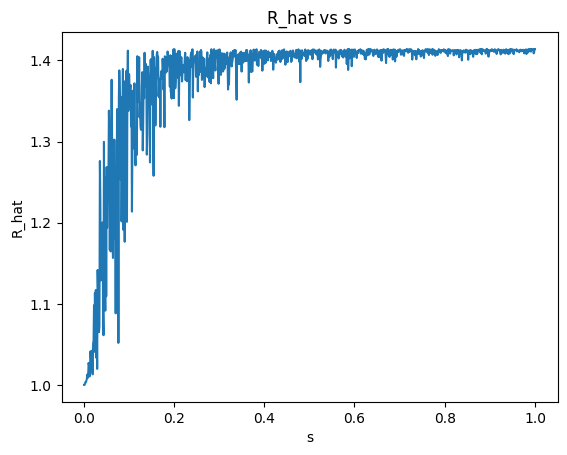

In [70]:
s_values = np.linspace(0.001, 1, 1000)
R_hat_values = []

for s in s_values:
    chains = multi_metropolis_hasting(J=4, s=s, N=2000, x_0=0)
    btw_var = between_variance(J=4, chains=chains, N=2000)
    ovr_var = overall_variance(J=4, chains=chains, N=2000)
    R_hat = np.sqrt((btw_var + ovr_var) / ovr_var)
    R_hat_values.append(R_hat)

import matplotlib.pyplot as plt
plt.plot(s_values, R_hat_values)
plt.xlabel("s")
plt.ylabel("R_hat")
plt.title("R_hat vs s")
plt.show()
